In [1]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr 
import seaborn as sns
import matplotlib.dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize': (15, 8)})

In [5]:
inflation= pd.read_csv('data/inflation.csv', sep=",")
monetary_base= pd.read_csv('data/monetary_base.csv', sep=",",thousands='.',dtype={'Monetary Base':np.int32})

In [6]:
inflation['Dates'] = pd.to_datetime(inflation['Dates'], format='%d/%m/%Y')    
inflation.index=inflation['Dates']
inflation=inflation.drop(['Dates'],axis=1)

In [7]:
monetary_base['Dates'] = pd.to_datetime(monetary_base['Dates'], format='%d/%m/%Y')    
monetary_base.index=monetary_base['Dates']
monetary_base=monetary_base.drop(['Dates'],axis=1)

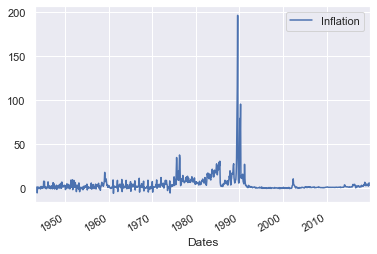

In [8]:
inflation.plot()

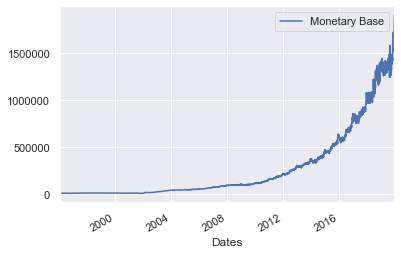

In [9]:
monetary_base.plot()

In [10]:
yearly_inflation_since_1996=inflation.truncate(before='1996-01-01')
yearly_inflation_since_1996=yearly_inflation_since_1996.resample('Y').sum()

In [11]:
yearly_change_monetary_base_since_1996=monetary_base.truncate(before='1996-01-01')
yearly_change_monetary_base_since_1996=yearly_change_monetary_base_since_1996.resample('Y').mean().pct_change()*100

In [12]:
yearly_data_since_1996=pd.DataFrame(yearly_change_monetary_base_since_1996)
yearly_data_since_1996=yearly_data_since_1996.assign(Inflation=yearly_inflation_since_1996['Inflation']).dropna()

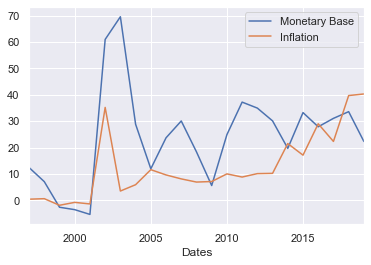

In [17]:
yearly_data_since_1996.plot()

In [18]:
rs = [yearly_data_since_1996['Inflation'].corr(yearly_data_since_1996['Monetary Base'].shift(lag)) for lag in np.arange(0,6,1)]

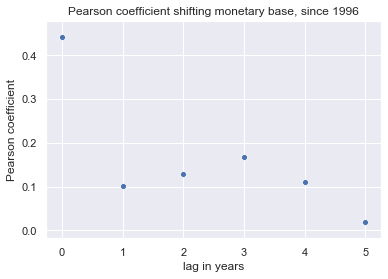

In [19]:
ax = sns.scatterplot(np.arange(0,6,1),rs)
ax.set(xlabel='lag in years', ylabel='Pearson coefficient',title='Pearson coefficient shifting monetary base, since 1996')
plt.show()

In [20]:
yearly_inflation_since_2003=inflation.truncate(before='2003-01-01')
yearly_inflation_since_2003=yearly_inflation_since_2003.resample('Y').sum()
yearly_change_monetary_base_since_2003=monetary_base.truncate(before='2003-01-01')
yearly_change_monetary_base_since_2003=yearly_change_monetary_base_since_2003.resample('Y').mean().pct_change()*100
data_since_2003=pd.DataFrame(yearly_change_monetary_base_since_2003)
data_since_2003=data_since_2003.assign(Inflation=yearly_inflation_since_2003['Inflation']).dropna()

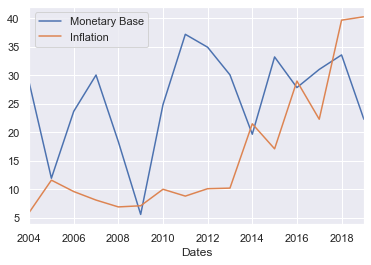

In [21]:
data_since_2003.plot()

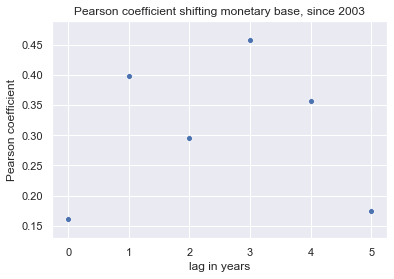

In [22]:
rs = [data_since_2003['Inflation'].corr(data_since_2003['Monetary Base'].shift(lag)) for lag in np.arange(0,6,1)]
ax = sns.scatterplot(np.arange(0,6,1),rs)
ax.set(xlabel='lag in years', ylabel='Pearson coefficient',title='Pearson coefficient shifting monetary base, since 2003')
plt.show()

## Working with 6 months intervals

In [23]:
midyearly_inflation_since_1996=inflation.truncate(before='1996-01-01')
midyearly_inflation_since_1996=midyearly_inflation_since_1996.resample('6M').sum()
midyearly_change_monetary_base_since_1996=monetary_base.truncate(before='1996-01-01')
midyearly_change_monetary_base_since_1996=midyearly_change_monetary_base_since_1996.resample('6M').mean().pct_change()*100

In [24]:
midyearly_data_since_1996=pd.DataFrame(midyearly_change_monetary_base_since_1996)
midyearly_data_since_1996=midyearly_data_since_1996.assign(Inflation=midyearly_inflation_since_1996['Inflation']).dropna()

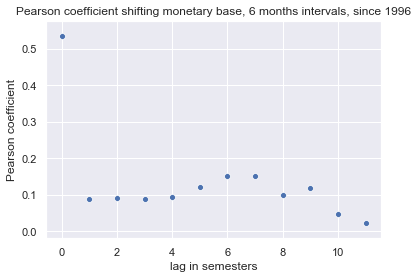

In [25]:
rs = [midyearly_data_since_1996['Inflation'].corr(midyearly_data_since_1996['Monetary Base'].shift(lag)) for lag in np.arange(0,12,1)]
ax = sns.scatterplot(np.arange(0,12,1),rs)
ax.set(xlabel='lag in semesters', ylabel='Pearson coefficient',title='Pearson coefficient shifting monetary base, 6 months intervals, since 1996')
plt.show()

In [26]:
midyearly_inflation_since_2003=inflation.truncate(before='2003-01-01')
midyearly_inflation_since_2003=midyearly_inflation_since_2003.resample('6M').sum()
midyearly_change_monetary_base_since_2003=monetary_base.truncate(before='2003-01-01')
midyearly_change_monetary_base_since_2003=midyearly_change_monetary_base_since_2003.resample('6M').mean().pct_change()*100
midyearly_data_since_2003=pd.DataFrame(midyearly_change_monetary_base_since_2003)
midyearly_data_since_2003=midyearly_data_since_2003.assign(Inflation=midyearly_inflation_since_2003['Inflation']).dropna()

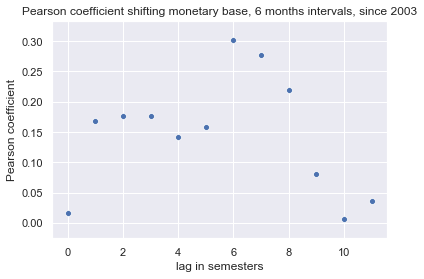

In [27]:
rs = [midyearly_data_since_2003['Inflation'].corr(midyearly_data_since_2003['Monetary Base'].shift(lag)) for lag in np.arange(0,12,1)]
ax = sns.scatterplot(np.arange(0,12,1),rs)
ax.set(xlabel='lag in semesters', ylabel='Pearson coefficient',title='Pearson coefficient shifting monetary base, 6 months intervals, since 2003')
plt.show()

After 2003, the best pearson coefficient is obtained with a 3 years lag, taking annual or biannual intervals.